In [42]:
%pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
# data -> model -> prediction
# split data into X and Y
# X reppresents everything I am using to make a prediciton
# Y represents prediction I am making 

In [44]:
from sklearn.datasets import load_breast_cancer

In [45]:
X, y = load_breast_cancer(return_X_y=True)

In [46]:
# Step 1: create model -> python object
# Step 2: learn from data -> .fit(X,y)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [48]:
mod = KNeighborsClassifier()

In [49]:
mod.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [50]:
pred = mod.predict(X)

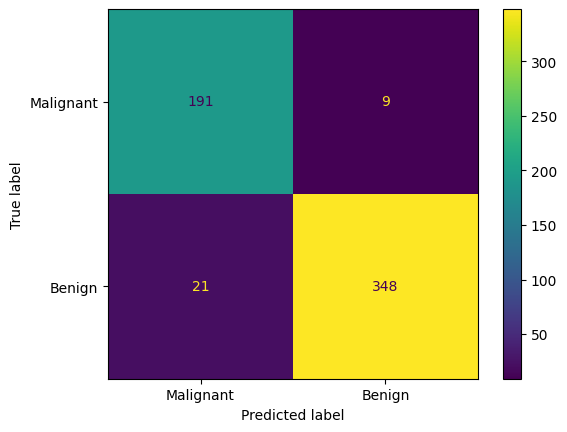

In [51]:
cm = confusion_matrix(pred, y)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
display.plot() 
plt.show()
plt.close()

In [52]:
pipe = Pipeline([
    ("scale", StandardScaler()), 
    ("model",  KNeighborsClassifier()) 
])
pipe.fit(X, y)

,steps,"[('scale', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


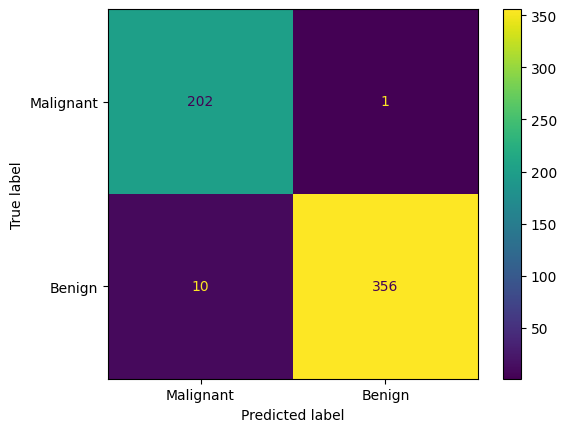

In [53]:
pred = pipe.predict(X)
cm_scaled = confusion_matrix(pred, y)
display_scaled = ConfusionMatrixDisplay(confusion_matrix=cm_scaled, display_labels=['Malignant', 'Benign'])
display_scaled.plot()
plt.show()

In [ ]:
pipe = Pipeline([
    ("scale", StandardScaler()), 
    ("model",  KNeighborsClassifier()) 
])
pipe.get_params()

In [62]:
mod = GridSearchCV(estimator = pipe, 
                   param_grid = {'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}, 
                   cv = 3)
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001168,0.000351,0.001585,0.000327,1,{'model__n_neighbors': 1},0.957895,0.963158,0.931217,0.950757,0.013983,9
1,0.001052,0.000318,0.001430,0.000380,2,{'model__n_neighbors': 2},0.947368,0.978947,0.904762,0.943693,0.030397,10
2,0.000532,0.000054,0.000919,0.000122,3,{'model__n_neighbors': 3},0.963158,0.963158,0.957672,0.961329,0.002586,6
3,0.000588,0.000083,0.000736,0.000026,4,{'model__n_neighbors': 4},0.963158,0.973684,0.947090,0.961311,0.010935,8
4,0.000445,0.000004,0.000808,0.000222,5,{'model__n_neighbors': 5},0.957895,0.968421,0.962963,0.963093,0.004298,4
5,0.000589,0.000193,0.000998,0.000276,6,{'model__n_neighbors': 6},0.957895,0.973684,0.962963,0.964847,0.006582,1
6,0.000466,0.000074,0.000833,0.000092,7,{'model__n_neighbors': 7},0.952632,0.963158,0.973545,0.963111,0.008538,2
7,0.000402,0.000013,0.000833,0.000168,8,{'model__n_neighbors': 8},0.957895,0.968421,0.957672,0.961329,0.005015,6
8,0.000549,0.000197,0.000946,0.000167,9,{'model__n_neighbors': 9},0.952632,0.968421,0.968254,0.963102,0.007404,3
9,0.000451,0.000103,0.000697,0.000032,10,{'model__n_neighbors': 10},0.952632,0.968421,0.962963,0.961339,0.006548,5


In [65]:
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 